<p style="font-family: Arial; font-size:2.2em;color:purple; font-style:bold"><br>
Iris Dataset'ini Yığınsal Kümeleme Algoritması ile Kümelere Ayırma<br><br>

</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold"><br>
Gerekli Dosyanın Yüklenmesi <br><br>

</p>

In [2]:

data = pd.read_csv('C:\\Users\\ceakn\\Desktop\\iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Taçyaprak ve çanakyaprak uzunluklarına göre türünü gösteren bir tablomuz var.

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold"><br>
Boş değer olup olmadığını kontrol edelim. 
<br><br>
</p>


In [4]:
data.isnull().any(axis=1).sum()

0

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold"><br>
Kullanılacak özellikleri seçelim.  
<br><br>
</p>

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [7]:
X = data[features].copy()

In [8]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X = X.values

In [10]:
type(X)

numpy.ndarray

<p style="font-family: Arial; font-size:1.75em;color:black; font-style:bold"><br>
SciPy ile Dendrogramın Çizdirilmesi
<br><br>
</p>

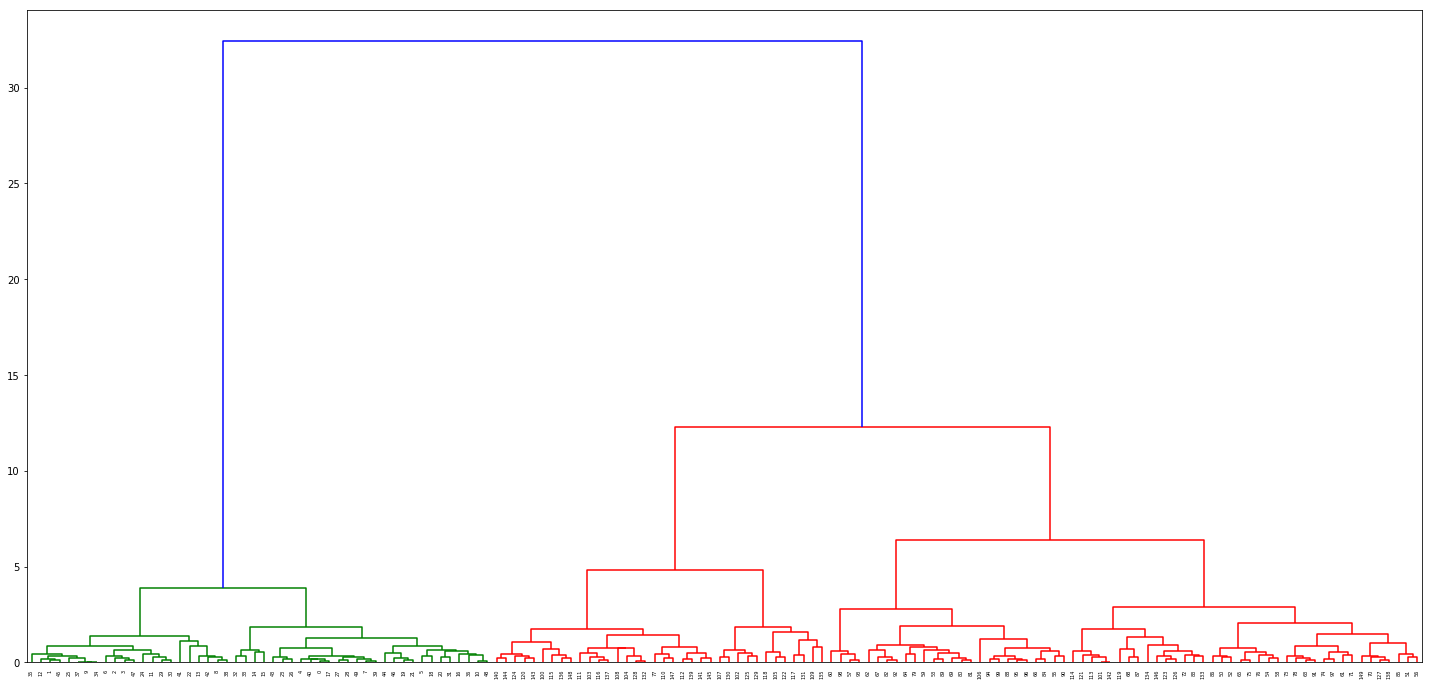

In [11]:
plt.figure(figsize=(25,12))
#from scipy.spatial.distance import pdist, squareform
dendo = dendrogram(linkage(X, method='ward'))


In [12]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
iris_predict = agg.fit_predict(X)

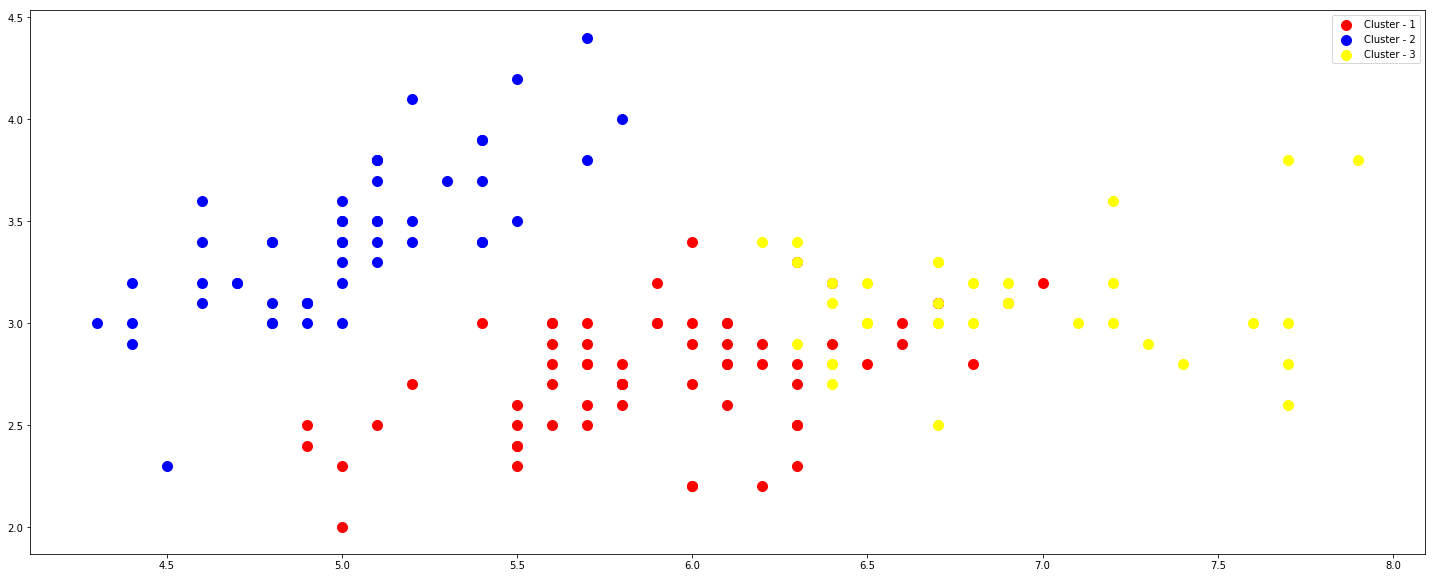

In [13]:
plt.figure(figsize=(25,10))
color = ['red','blue','yellow']
for i in range(3):
    plt.scatter(X[iris_predict == i, 0], X[iris_predict == i, 1], s = 100, c = color[i], label = 'Cluster - {:d}'.format(i+1))
plt.legend()
plt.show()